## **Section 6: Token Bucket Countermeasure**

- Using this notebook, figure 6 in our paper can be obtained.

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from os.path import join, abspath
from matplotlib.lines import Line2D

In [2]:
DATA_DIR = abspath("./1_data_token-bucket")

In [3]:
def load_from_json(json_path):
    return json.loads(open(json_path).read())


def load_sim_results(json_path, attack_times):

    # Load simulation result JSON.
    res = load_from_json(json_path)

    # Pretty-format the adversary-controlled share of HSDirs.
    h = "-1"
    if res["n_adv_hsdirs"] == 1:
        h = "1/6"
    elif res["n_adv_hsdirs"] == 2:
        h = "1/3"
    elif res["n_adv_hsdirs"] == 6:
        h = "1"

    # Pretty-format the adversarial relay bandwidth share.
    b = "%d%%" % (100 * float(res["adv_bw_share"]))

    # Extract the initialization value for the token bucket.
    tb_iv = res["n_initial_tokens"]

    # Extract the refill rate for the token bucket.
    tb_refill = res["token_refill_rate"]

    # Extract whether Vanguards-lite was enabled.
    vanguardslite_enabled = False
    if "vanguardslite_enabled" in res:
        vanguardslite_enabled = res["vanguardslite_enabled"]

    simulation_duration = res["simulation_duration"]

    # Append each attack duration with attached metadata to list of all results.
    for timestamp in res["attack_durations"]:
        attack_times.append(
            (h, b, tb_iv, tb_refill, vanguardslite_enabled, timestamp))

In [4]:
attack_times = []

for json_path in glob(join(DATA_DIR, "time_to_double_comp_*.json")):
    load_sim_results(json_path, attack_times)

In [5]:
df = pd.DataFrame(
    attack_times, columns=["h", "b", "tb_iv", "tb_refill", "vanguardslite_enabled", "attack_duration"])
df.head(15)

,h,b,tb_iv,tb_refill,vanguardslite_enabled,attack_duration
0,1/6,5%,10,0.01666,False,300.0
1,1/6,5%,10,0.01666,False,300.0
2,1/6,5%,10,0.01666,False,300.0
3,1/6,5%,10,0.01666,False,300.0
4,1/6,5%,10,0.01666,False,300.0
5,1/6,5%,10,0.01666,False,300.0
6,1/6,5%,10,0.01666,False,300.0
7,1/6,5%,10,0.01666,False,300.0
8,1/6,5%,10,0.01666,False,300.0
9,1/6,5%,10,0.01666,False,300.0


In [6]:
assert df["vanguardslite_enabled"].any() == False
assert df["vanguardslite_enabled"].all() == False
assert df["tb_iv"].astype(bool).any() == True
assert df["tb_iv"].astype(bool).all() == True
assert df["tb_refill"].astype(bool).any() == True
assert df["tb_refill"].astype(bool).all() == True

In [7]:
pd.options.display.float_format = "{:,.3f}".format

df.groupby(["b", "h", "tb_iv", "tb_refill"]).attack_duration.describe(percentiles=[0.25, 0.50, 0.90, 0.95, 0.99])

count    mean     std   min     25%     50%  \
b  h   tb_iv tb_refill                                                     
5% 1   5     0.017     143,350.000 286.327  54.876 0.277 300.000 300.000   
             0.100     143,350.000 223.893  95.389 0.277 151.959 292.103   
       10    0.017     143,350.000 265.109  89.219 0.232 300.000 300.000   
             0.100     143,350.000 199.614 109.553 0.301 103.446 243.403   
       15    0.017     143,350.000 238.020 114.894 0.241 300.000 300.000   
             0.100     143,350.000 175.177 118.685 0.345  54.061 194.445   
   1/3 5     0.017     143,350.000 298.313  19.578 0.387 300.000 300.000   
             0.100     143,350.000 286.425  47.053 0.660 300.000 300.000   
       10    0.017     143,350.000 294.955  35.796 0.604 300.000 300.000   
             0.100     143,350.000 280.493  59.104 0.485 300.000 300.000   
       15    0.017     143,350.000 290.549  49.759 0.493 300.000 300.000   
             0.100     143,350.000 274.158  69.848 0.544 300.000 300.000   
   1/6 5     0.017     143,350.000 299.553  10.179 0.745 300.000 300.000   
             0.100     143,350.000 296.235  25.038 0.627 300.000 300.000   
       10    0.017     143,350.000 298.619  18.719 0.733 300.000 300.000   
             0.100     143,350.000 294.346  32.519 0.387 300.000 300.000   
       15    0.017     143,350.000 297.374  26.417 0.965 300.000 300.000   
             0.100     143,350.000 291.974  40.173 0.804 300.000 300.000   

                           90%     95%     99%     max  
b  h   tb_iv tb_refill                                  
5% 1   5     0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 300.889  
       10    0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 300.232  
       15    0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 303.330  
   1/3 5     0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 302.105  
       10    0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 300.189  
       15    0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 303.330  
   1/6 5     0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 301.336  
       10    0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 300.076  
       15    0.017     300.000 300.000 300.000 300.000  
             0.100     300.000 300.000 300.000 300.010

In [8]:
# Only select results for adversarial best case: h = 1.0, b = 5%.
df_advbest = df[(df.h == "1") & (df.b == "5%")]
df_advbest.head(15)

,h,b,tb_iv,tb_refill,vanguardslite_enabled,attack_duration
1720200,1,5%,10,0.017,False,300.000
1720201,1,5%,10,0.017,False,183.092
1720202,1,5%,10,0.017,False,300.000
1720203,1,5%,10,0.017,False,300.000
1720204,1,5%,10,0.017,False,300.000
1720205,1,5%,10,0.017,False,300.000
1720206,1,5%,10,0.017,False,300.000
1720207,1,5%,10,0.017,False,63.137
1720208,1,5%,10,0.017,False,300.000
1720209,1,5%,10,0.017,False,300.000


In [9]:
df_less300 = df[(df.h == "1") & (df.b == "5%") & (df.attack_duration < 300.0)]
print("Share of attacks that take < 300 seconds: {:.2f}%".format((len(df_less300) / len(df)) * 100.0))

df_advbest_less300 = df_advbest[df_advbest.attack_duration < 300.0]
print("Share of \"h=1, b=5%\" attacks that take < 300 seconds: {:.2f}%".format((len(df_advbest_less300) / len(df_advbest)) * 100.0))

Share of attacks that take < 300 seconds: 12.34%
Share of "h=1, b=5%" attacks that take < 300 seconds: 37.01%


In [10]:
pd.options.display.float_format = "{:,.2f}".format

df_h_one_two = df[(df["h"] == "1/3") | (df["h"] == "1/6")]
df_h_one_two.groupby(["b", "h", "tb_iv", "tb_refill"]).attack_duration.describe(percentiles=[0.25, 0.50, 0.90, 0.95, 0.99])

count   mean   std  min    25%    50%    90%  \
b  h   tb_iv tb_refill                                                     
5% 1/3 5     0.02      143,350.00 298.31 19.58 0.39 300.00 300.00 300.00   
             0.10      143,350.00 286.42 47.05 0.66 300.00 300.00 300.00   
       10    0.02      143,350.00 294.95 35.80 0.60 300.00 300.00 300.00   
             0.10      143,350.00 280.49 59.10 0.48 300.00 300.00 300.00   
       15    0.02      143,350.00 290.55 49.76 0.49 300.00 300.00 300.00   
             0.10      143,350.00 274.16 69.85 0.54 300.00 300.00 300.00   
   1/6 5     0.02      143,350.00 299.55 10.18 0.74 300.00 300.00 300.00   
             0.10      143,350.00 296.23 25.04 0.63 300.00 300.00 300.00   
       10    0.02      143,350.00 298.62 18.72 0.73 300.00 300.00 300.00   
             0.10      143,350.00 294.35 32.52 0.39 300.00 300.00 300.00   
       15    0.02      143,350.00 297.37 26.42 0.97 300.00 300.00 300.00   
             0.10      143,350.00 291.97 40.17 0.80 300.00 300.00 300.00   

                          95%    99%    max  
b  h   tb_iv tb_refill                       
5% 1/3 5     0.02      300.00 300.00 300.00  
             0.10      300.00 300.00 302.10  
       10    0.02      300.00 300.00 300.00  
             0.10      300.00 300.00 300.19  
       15    0.02      300.00 300.00 300.00  
             0.10      300.00 300.00 303.33  
   1/6 5     0.02      300.00 300.00 300.00  
             0.10      300.00 300.00 301.34  
       10    0.02      300.00 300.00 300.00  
             0.10      300.00 300.00 300.08  
       15    0.02      300.00 300.00 300.00  
             0.10      300.00 300.00 300.01

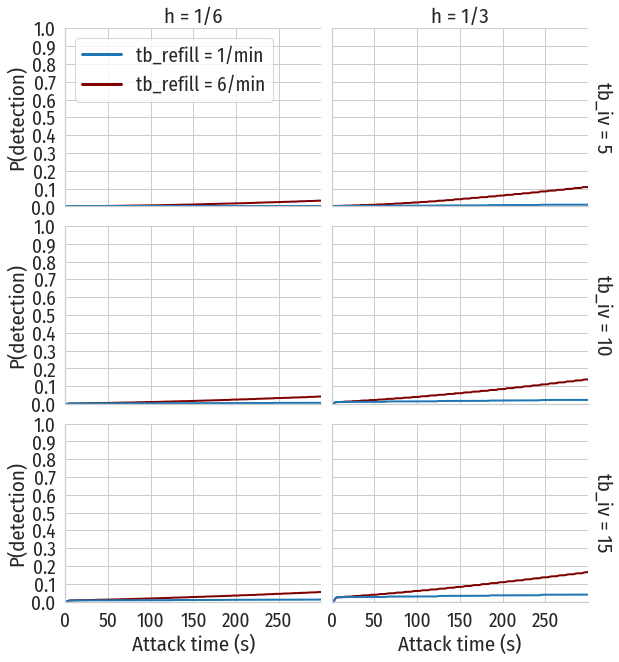

In [11]:
SIMULATION_DURATION = 299.9

sns.set()
sns.set(style="whitegrid", font_scale=1.75)
sns.set_style({"font.family": "Fira Sans Condensed"})

tbr1 = Line2D([0], [0], label = "tb_refill = 1/min", color = "tab:blue", lw = 3.0)
tbr6 = Line2D([0], [0], label = "tb_refill = 6/min", color = "maroon", lw = 3.0)

hue_palette = {0.01666: "tab:blue", 0.1: "maroon"}

fig = sns.displot(
    df_h_one_two, x = "attack_duration", row = "tb_iv", col = "h", hue = "tb_refill",
    kind = "ecdf", height = 3.0, aspect = 1.4, legend = False,
    facet_kws = dict(margin_titles=True), lw = 2.0,
    row_order = (5, 10, 15), col_order = ("1/6", "1/3"),
    palette = hue_palette,
)

fig.set_axis_labels(x_var = "Attack time (s)", y_var = "P(detection)")
fig.set_titles("")

fig.axes[0][0].legend(handles = [tbr1, tbr6], loc = "upper left")

fig.set(xlim=(0.0, SIMULATION_DURATION), ylim=(0.0, 1.0),
        xticks=np.arange(0.0, SIMULATION_DURATION, 50.0),
        yticks=np.arange(0.0, 1.1, 0.1))

plt.tight_layout(pad = 0.0, w_pad = 0.25, h_pad = 0.0)

plt.show()